In [24]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [25]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

In [26]:
sys.path.append(os.path.abspath("../.."))

In [27]:
from analysis.preprocessing import load_and_clean_acid_data, load_and_clean_red_list_index_data

In [28]:
df_acid = load_and_clean_acid_data()
df_red_list = load_and_clean_red_list_index_data()

In [29]:
df_red_global = df_red_list.groupby('Year')['_15_5_1__er_rsk_lst'].mean().reset_index()
df_red_global.columns = ['year', 'red_list_index']

# Nettoyage des données d'acidification
df_acid_clean = df_acid[['year', 'Ocean_acidification(in_PH)']].dropna()


In [30]:
df_merged = pd.merge(df_acid_clean, df_red_global, on='year', how='inner')
print(f"Données communes: {len(df_merged)} points de données")
print(f"Période d'analyse: {df_merged['year'].min():.0f} - {df_merged['year'].max():.0f}")


Données communes: 30 points de données
Période d'analyse: 1993 - 2022


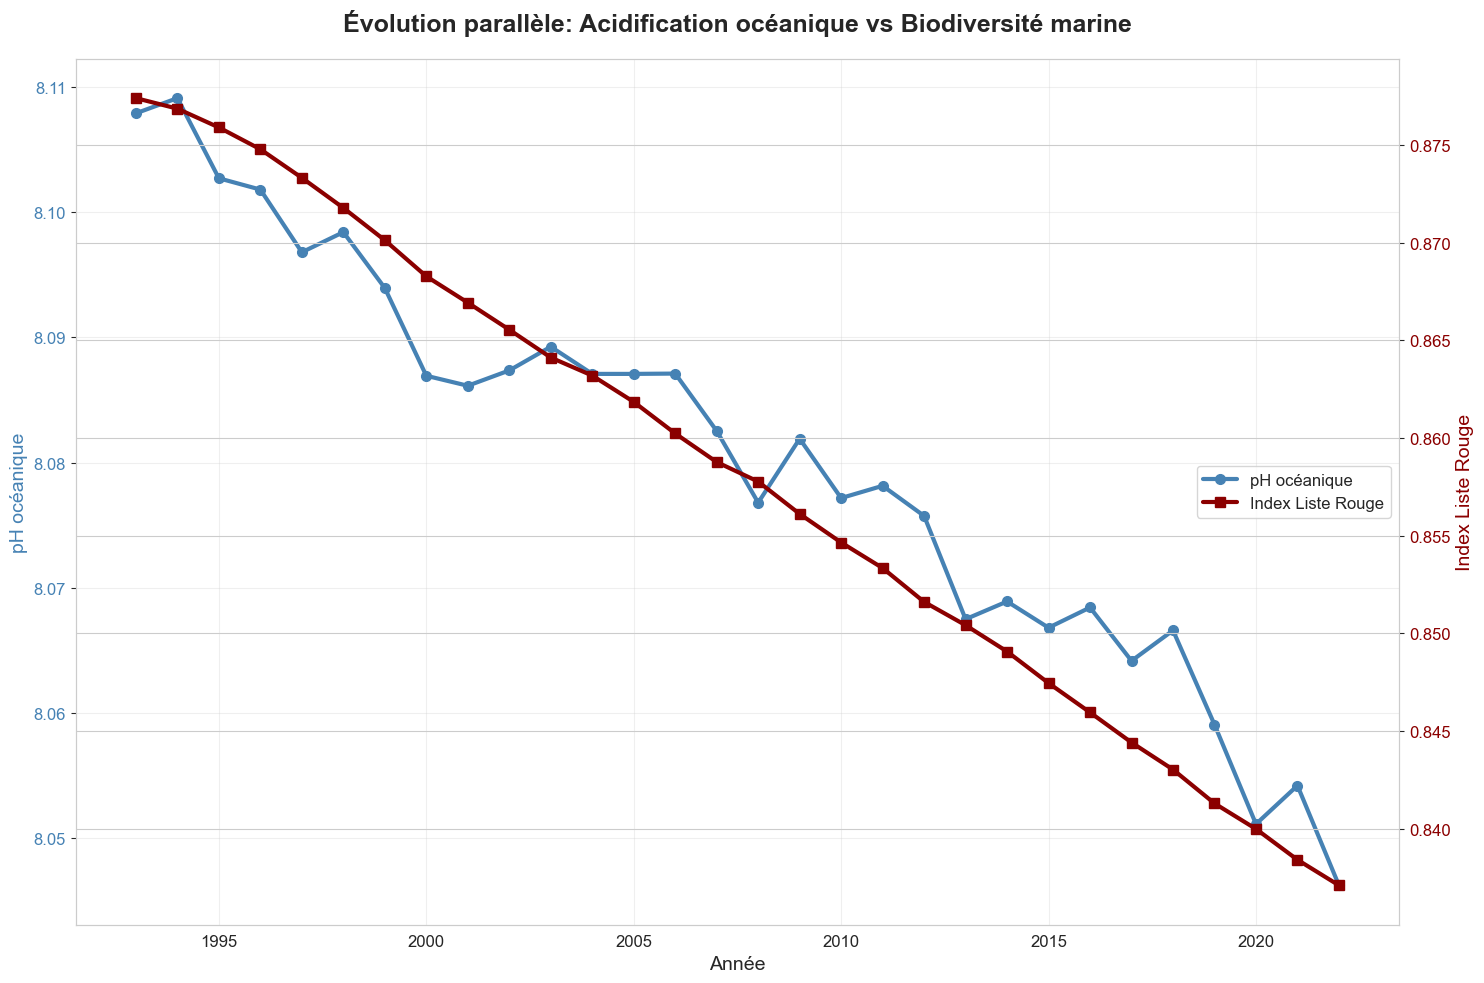

In [31]:
fig, ax1 = plt.subplots(figsize=(15, 10))

# pH océanique (axe de gauche)
color1 = 'steelblue'
ax1.set_xlabel('Année', fontsize=14)
ax1.set_ylabel('pH océanique', color=color1, fontsize=14)
line1 = ax1.plot(df_merged['year'], df_merged['Ocean_acidification(in_PH)'],
                'o-', color=color1, linewidth=3, markersize=7, label='pH océanique')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Index Liste Rouge (axe de droite)
ax2 = ax1.twinx()
color2 = 'darkred'
ax2.set_ylabel('Index Liste Rouge', color=color2, fontsize=14)
line2 = ax2.plot(df_merged['year'], df_merged['red_list_index'],
                's-', color=color2, linewidth=3, markersize=7, label='Index Liste Rouge')
ax2.tick_params(axis='y', labelcolor=color2)

# Titre et légende
ax1.set_title('Évolution parallèle: Acidification océanique vs Biodiversité marine',
              fontsize=18, fontweight='bold', pad=20)

# Légende combinée
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right', fontsize=12)

plt.tight_layout()
plt.show()


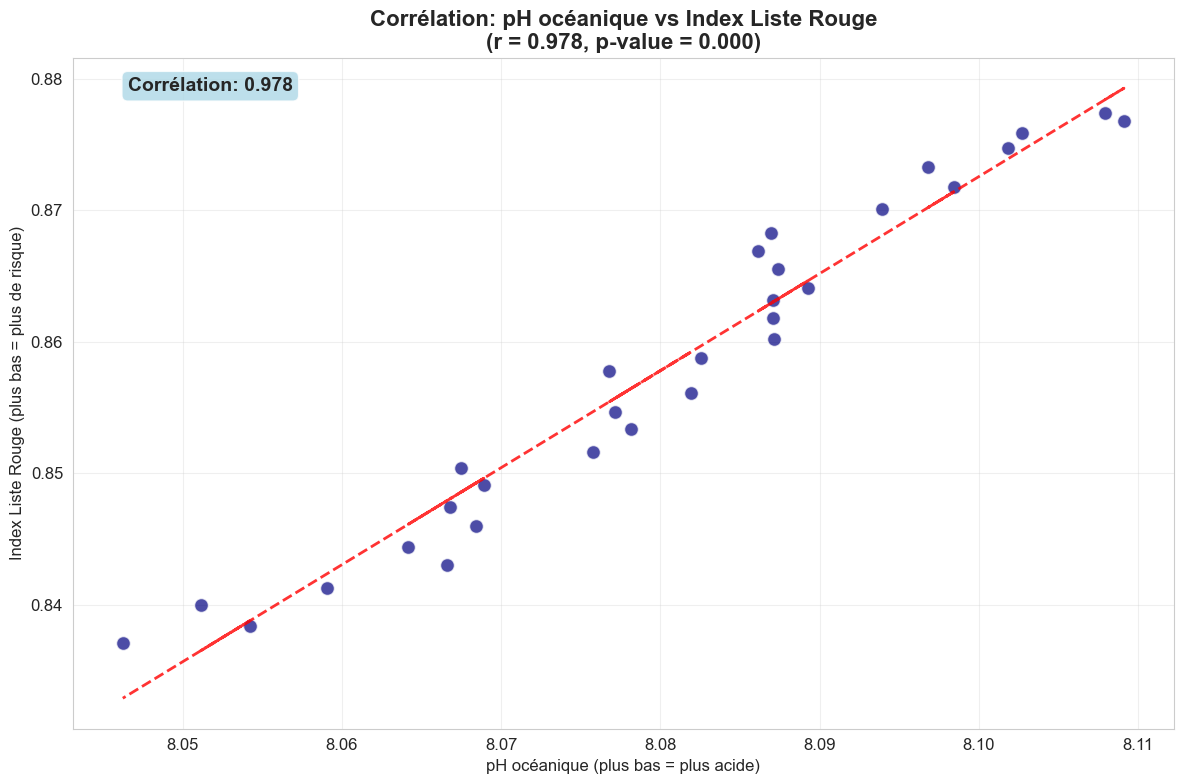

In [32]:
plt.figure(figsize=(12, 8))

# Calcul de la corrélation
corr_coef, p_value = pearsonr(df_merged['Ocean_acidification(in_PH)'], df_merged['red_list_index'])

# Graphique de dispersion avec ligne de tendance
plt.scatter(df_merged['Ocean_acidification(in_PH)'], df_merged['red_list_index'],
           s=100, alpha=0.7, color='navy', edgecolor='white', linewidth=1)

# Ligne de tendance
z = np.polyfit(df_merged['Ocean_acidification(in_PH)'], df_merged['red_list_index'], 1)
p = np.poly1d(z)
plt.plot(df_merged['Ocean_acidification(in_PH)'], p(df_merged['Ocean_acidification(in_PH)']),
         "r--", alpha=0.8, linewidth=2)

plt.title(f'Corrélation: pH océanique vs Index Liste Rouge\n(r = {corr_coef:.3f}, p-value = {p_value:.3f})',
          fontsize=16, fontweight='bold')
plt.xlabel('pH océanique (plus bas = plus acide)', fontsize=12)
plt.ylabel('Index Liste Rouge (plus bas = plus de risque)', fontsize=12)
plt.grid(True, alpha=0.3)

# Annotation
plt.annotate(f'Corrélation: {corr_coef:.3f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=14, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

plt.tight_layout()
plt.show()
